<a href="https://colab.research.google.com/github/KapilKhanal/AdvLinearAlgebra/blob/master/MDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image of the derivations 

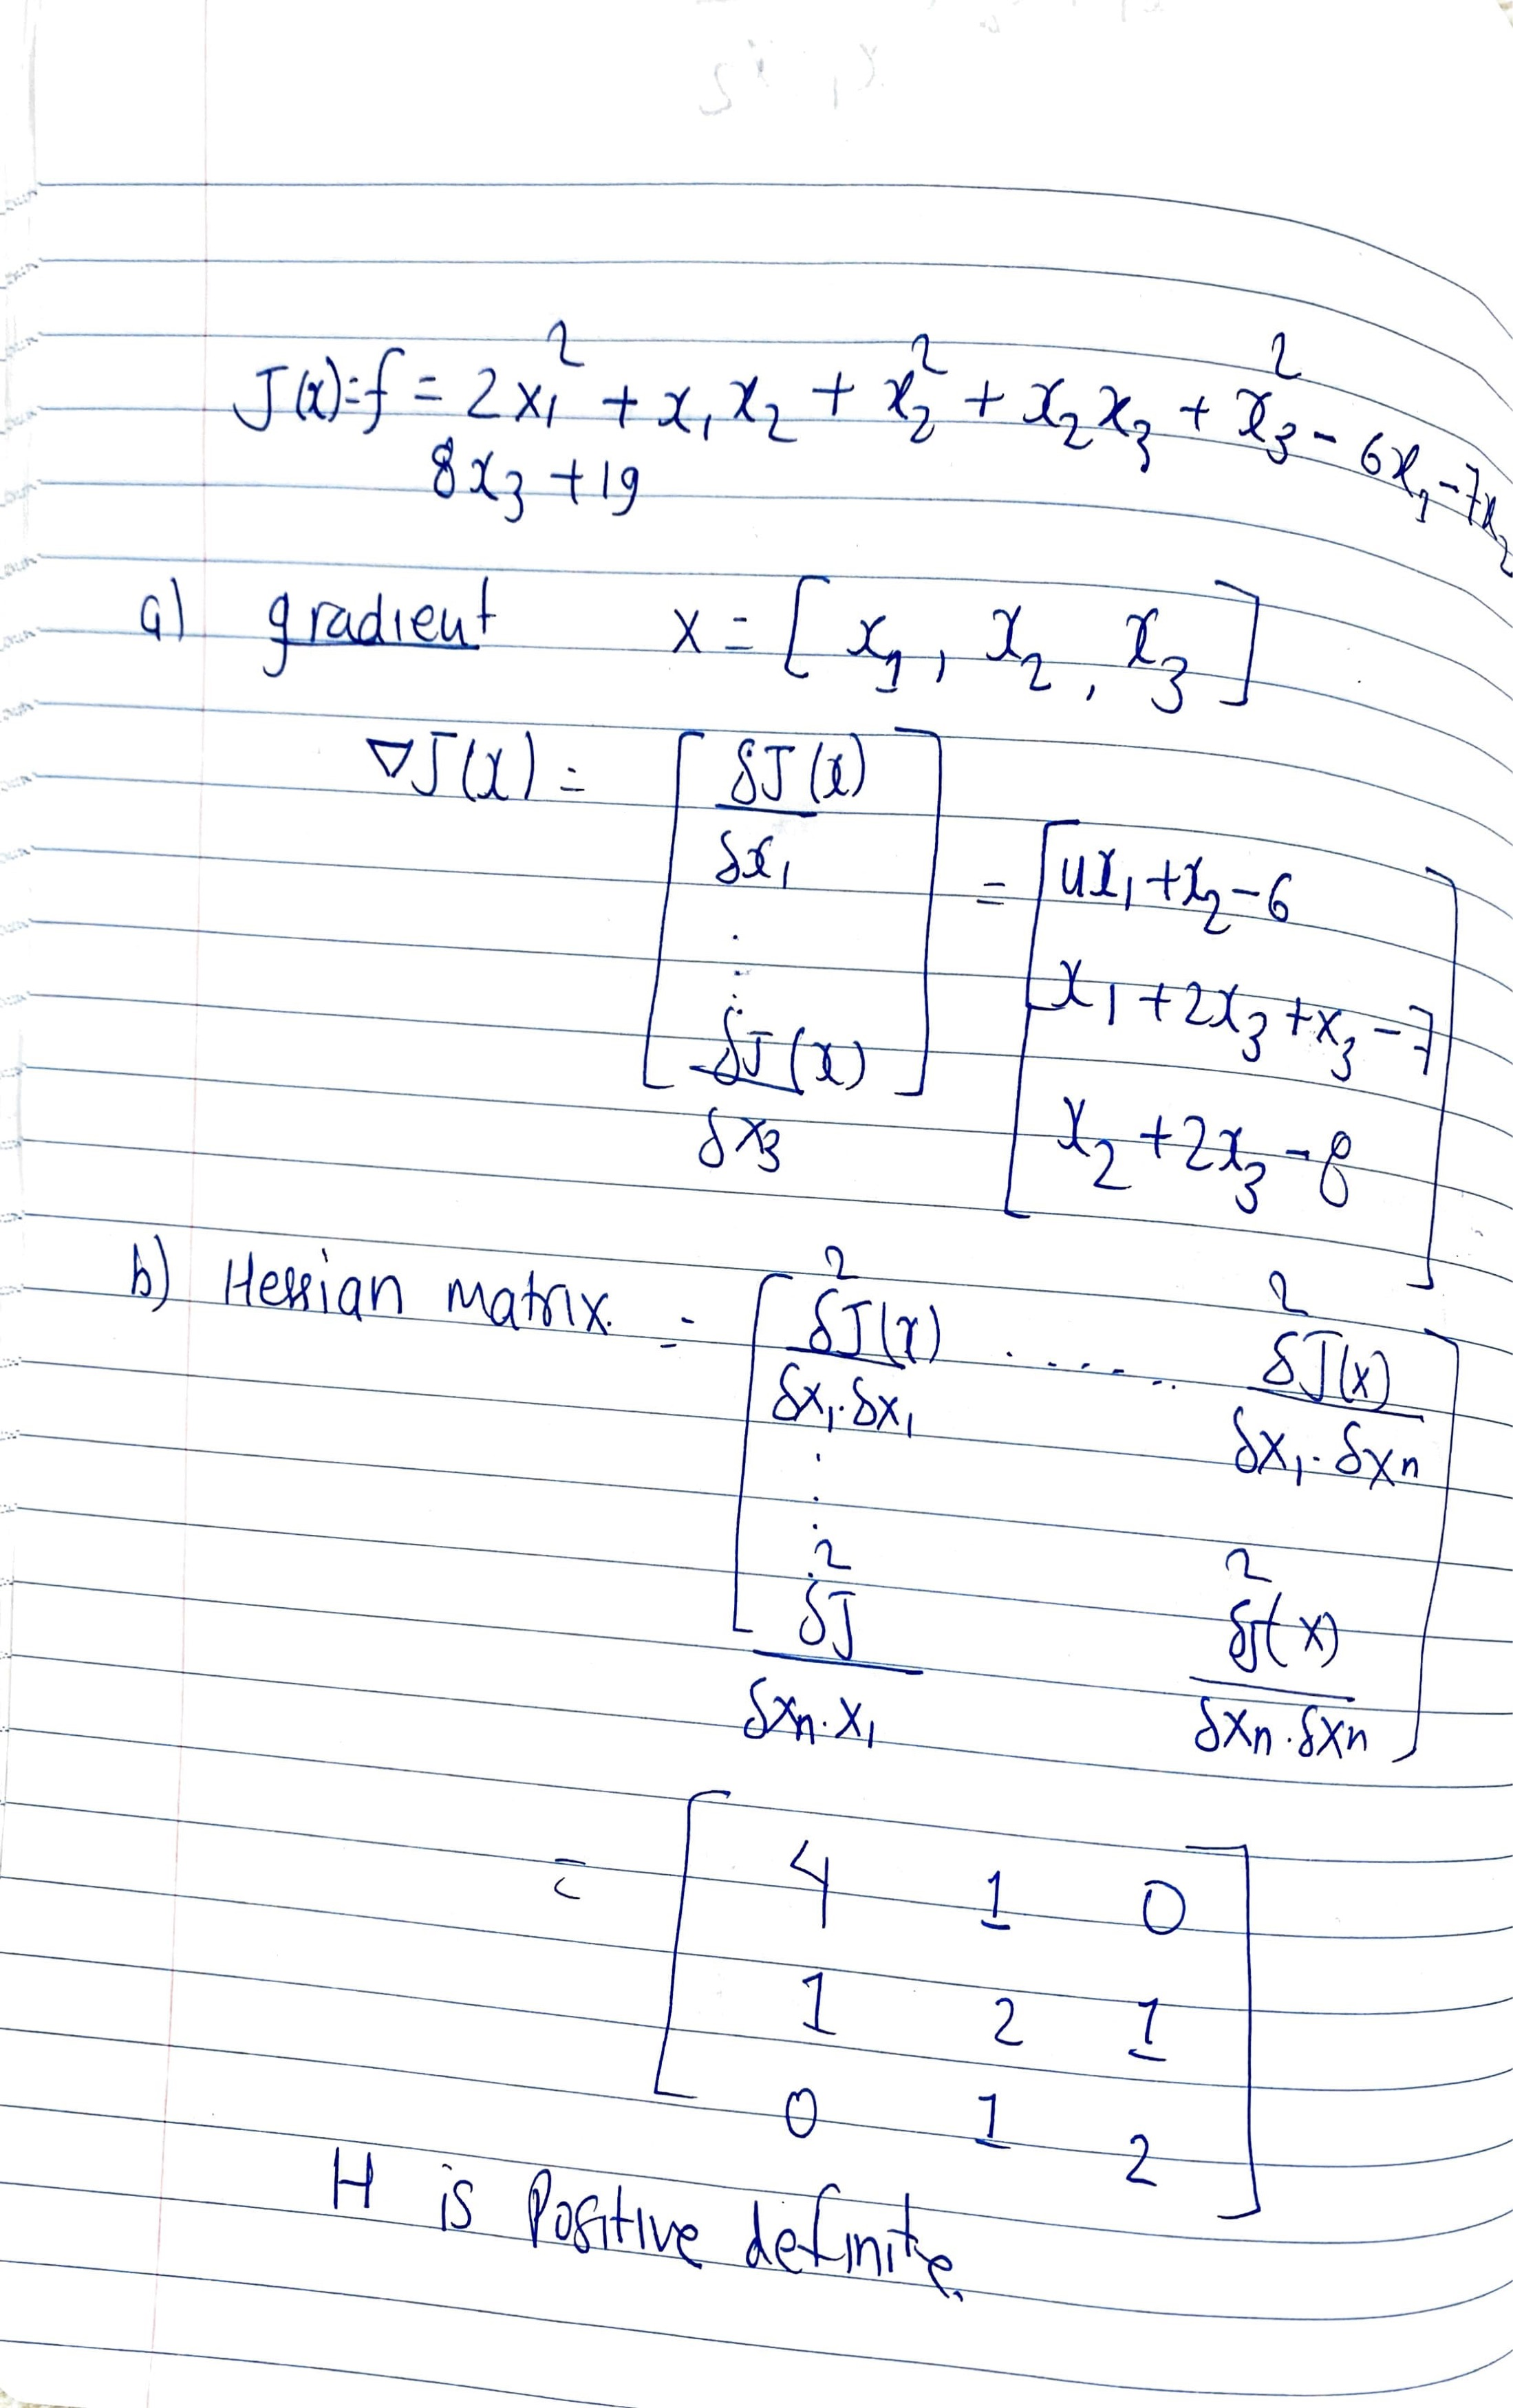

Solving for the values using hessian 



In [6]:
import numpy as np
a = np.array([[4, 1,0], [1, 2,1],[0,1,2]])
b = np.array([6, 7, 8])
x = np.linalg.solve(a, b)
x

array([1.2, 1.2, 3.4])

All the eigen values of the hessian are positive Hence the values are optimal

In [10]:
np.linalg.eig(a)[0]


array([4.4811943 , 2.68889218, 0.82991351])

3 dimension cube of design variables and the value of the function evaluation is shown as the color and size. so a white spot in the cube below is where the minimum occurs

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


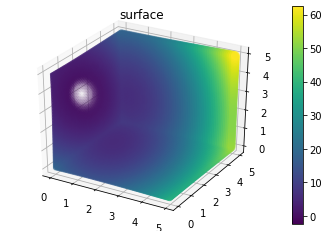

In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X1 = np.arange(0, 5, 0.08)
X2 = np.arange(0, 5, 0.08)
X3 = np.arange(0, 5, 0.08)
X1, X2, X3 = np.meshgrid(X1, X2, X3)
F = 2*(X1)**2 + (X1*X2) + (X2**2) +(X2*X3) + X3**2 - 6*X1 - 7*X2 - 8*X3 + 19
colors = F
ax = plt.axes(projection='3d')
img = ax.scatter(X1,X2, X3,c = F,s = F)
ax.set_title('surface')
fig.colorbar(img)

In [8]:
np.min(F)

-2.3984000000000023

## Problem Statement
Police-Civilian interaction depends on multiple inputs from various subsystem involved on it. Few sub systems are People calling 911 , 911 call takers, police dispatch. Many unfortunate cases arise potentially due to the non optimal system of this process. For example, most of the calls 911 systems get are disturbance calls which are non emergency calls. But, because many police department optimize the patrolling for response time(with the emergency in mind), police rush to the scene where there is no emergency but they interpret it as emergency and act like it. Depending on the outcome of such interaction, it might affect the civilian to not call the 911 system when in reality they should always call for help when they feel like they need it.

Designing a framework where ‘Community Responders’(CR)(like Eugene, Oregon does it) are sent to the low risk emergency calls and police officers to high risk time sensitive situations. This model comes with its own drawbacks. Such as community responders wrongly sent to the high threat level cases. 

This is inherently a multidisciplinary system that has unclear relationship between the objective, the design variables need thorough socilogical survey and expert input and the parameters.  However, below I am trying to map this problem into the MDO framework with an explainable/Heuristic optimization like agent based modeling techniques.

### Problem formulation
##### Objective function
$Min \ J = [J_1, J_2]$ 
where ,
  $ J_1(X) = response\ time$


  $J_2(X) = overall \ cost$


  ### Design Vector
  X = \begin{bmatrix}
\#Police\ units  \\
\ Location\ of\ Police Station  \\
\# CR units \\ 
\# crime\ location
\end{bmatrix}

####Parameters 
 - Type of Crime , threat level

#### Constraints
$Police\ Units (Pu>0)$
$Community Responders\ Units (Cu>0)$
$Location \in{US\ location}$



Optimization Modeling and Methodology

We will use surrogate modeling to optimize this problem. Surrogate optimization using empirical data to construct the objective function. 

First step : We collect empirical data on our design variables $X$. Assemble the response which are our Objective functions ( # of Cr, police Units(Pu) , cost) and design variable in a training dataset. We will not have the objective evaluation for all the parameters in the design space.
Once we have the regression model as objective function, then we proceed for MDO. In our case we will have two regression model as we are optimizing the objective vector $[J1,J2]$



### Main table 

Tables:
``` markdown
|Num of police units         | [Unit] |x1 |Pu | 0-10  
|Num of Community responders | [-]    |x2 |Cr |0-2
| Location/Area             | miles^2|x3 |L1 |1-15
| Response time.            | [min]  |J1 | |1-5 min
| Total cost of dispatching |$.      |J2 | |10k-1M
```

###Block Diagram and Optimization 
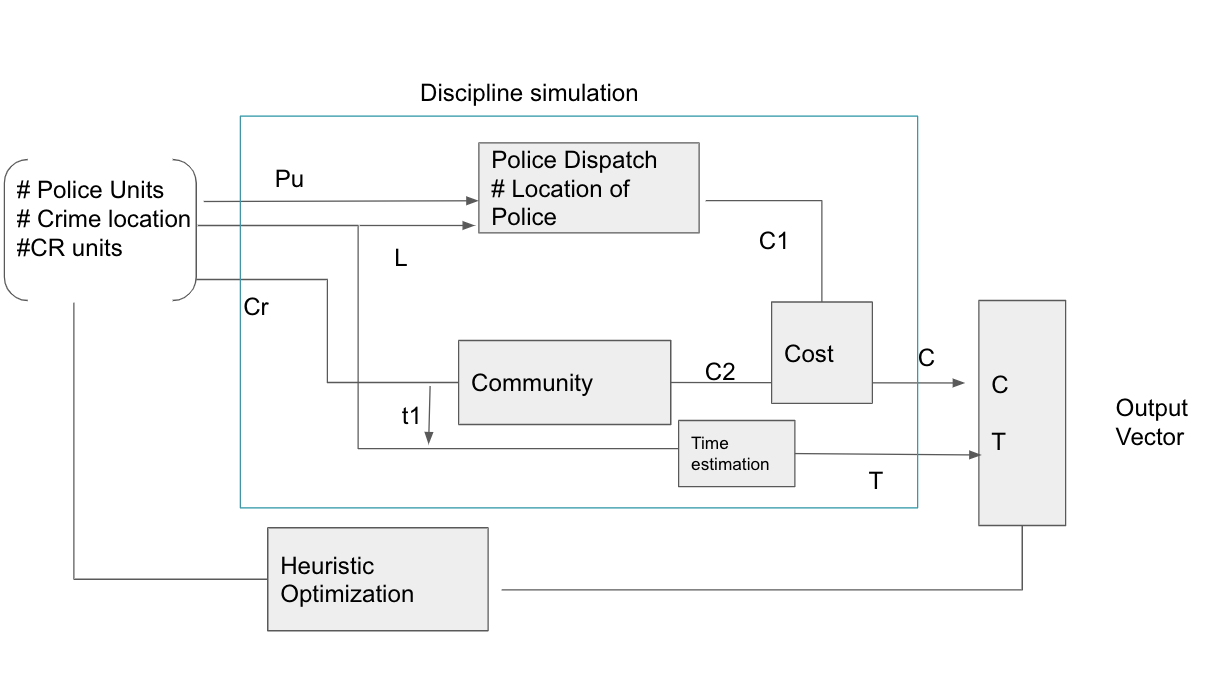

N2 Diagram
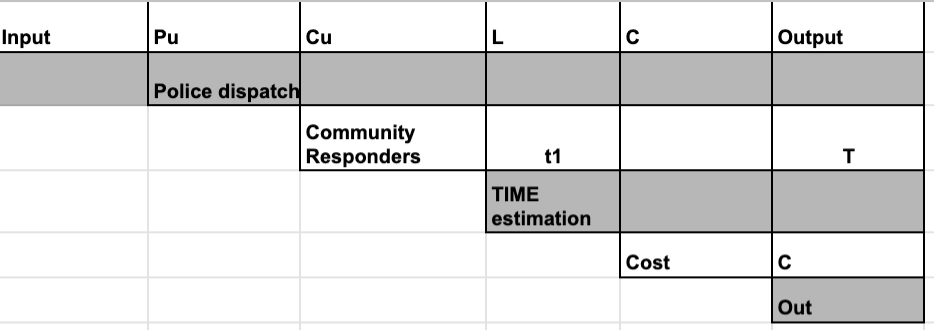

References
Does police brutality calls reduce 911 calls?
https://www.semanticscholar.org/paper/b7bec26bcbb005ce9d8d4e3403c22847f57ec7aa
